## 問題

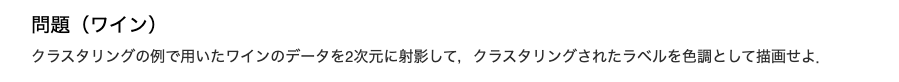

In [1]:
from IPython.display import Image
Image('wine.png')

## 解答

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### クラスタリング

In [3]:
L = [
    "Alcohol",
    "Malic",
    "Ash",
    "Alcalinity",
    "Magnesium",
    "Phenols",
    "Flavanoids",
    "Nonflavanoid",
    "Proanthocyanins",
    "Color",
    "Hue",
    "OD280",
    "OD315",
    "Proline"
]
wine = pd.read_csv("http://logopt.com/data/wine.data", names=L)
wine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280,OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(wine)

KMeans(n_clusters=4)

In [5]:
wine["label"] = kmeans.labels_
wine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280,OD315,Proline,label
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


### PCA

In [6]:
wine['Alcohol'].unique()

array([1, 2, 3])

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
X = wine.drop('label', axis=1)
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:1]

array([[-1.21394365,  1.51861254, -0.5622498 ,  0.23205254, -1.16959318,
         1.91390522,  0.80899739,  1.03481896, -0.65956311,  1.22488398,
         0.25171685,  0.36217728,  1.84791957,  1.01300893]])

In [9]:
pca = PCA(n_components=2)
# Z = pca.fit_transform(X_scaled)
Z = pca.fit_transform(X)
Z[:3]

array([[318.56405485,  21.4907729 ],
       [303.09851427,  -5.36608268],
       [438.06206336,  -6.53798613]])

In [10]:
wine['X'] = Z[:, 0]
wine['Y'] = Z[:, 1]
wine.head(3)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280,OD315,Proline,label,X,Y
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,318.564055,21.490773
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,303.098514,-5.366083
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3,438.062063,-6.537986


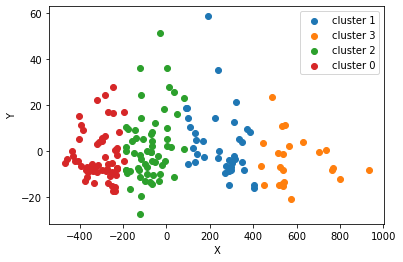

In [11]:
labels = wine['label'].unique()

_, ax = plt.subplots()

for label in labels:
    wine_l = wine[wine['label'] == label]
    ax.scatter(wine_l['X'], wine_l['Y'], label=f'cluster {label}')
    
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

### t-SNE

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [13]:
X = wine.drop('label', axis=1)
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:1]

array([[-1.21394365,  1.51861254, -0.5622498 ,  0.23205254, -1.16959318,
         1.91390522,  0.80899739,  1.03481896, -0.65956311,  1.22488398,
         0.25171685,  0.36217728,  1.84791957,  1.01300893,  1.01428466,
         1.6407212 ]])

In [14]:
# Z = TSNE(n_components=2, random_state=1).fit_transform(X_scaled)
Z = TSNE(n_components=2, random_state=1).fit_transform(X)
Z[:3]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


array([[ -7.144102 ,  -9.767351 ],
       [ -6.9421253,  -9.481087 ],
       [ -8.91819  , -11.176886 ]], dtype=float32)

In [15]:
wine['X'] = Z[:, 0]
wine['Y'] = Z[:, 1]
wine.head(3)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280,OD315,Proline,label,X,Y
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,-7.144102,-9.767351
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,-6.942125,-9.481087
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3,-8.918190,-11.176886


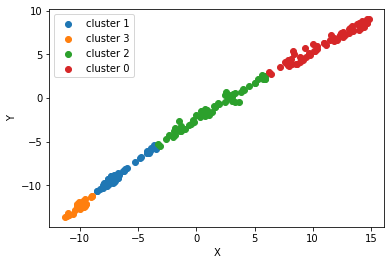

In [16]:
labels = wine['label'].unique()

_, ax = plt.subplots()

for label in labels:
    wine_l = wine[wine['label'] == label]
    ax.scatter(wine_l['X'], wine_l['Y'], label=f'cluster {label}')
    
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()